For the file titled "Lie Detector Regression Analysis," my primary objective is to leverage regression analysis techniques to identify patterns and predict outcomes related to the lie detector test data. Given the nature of the tasks outlined in the script you shared, here's a detailed and refined objective:

### Objective for the "Lie Detector Regression Analysis" File

**Objective:** Develop a robust regression model to predict the outcomes of a lie detector test based on various predictors such as participant demographics and test scores. This analysis aims to:
- **Understand Relationships:** Determine how different variables such as `grand_total` scores and other categorical factors like `gender` influence the outcomes (`fraud_alert`) of the lie detector test.
- **Predictive Accuracy:** Enhance the accuracy of predicting whether participants are likely to have a 'Good' or 'Bad' outcome based on their test scores and other associated factors.
- **Model Optimization:** Utilize various regression techniques including Ordinary Least Squares (OLS) and logistic regression to model these relationships. Optimize these models by evaluating their performance through statistical measures such as R-squared, residuals, and visual diagnostics like residual plots and mosaic plots.
- **Practical Application:** Apply the findings to improve the assessment strategies for new participants, tailoring interventions based on predicted outcomes to better manage the program's effectiveness.


This objective ensures a comprehensive approach to analyzing the lie detector test data, focusing on predictive accuracy and practical applicability to real-world scenarios within your program. By achieving these goals, the analysis can significantly contribute to improving the assessment and intervention strategies based on empirical evidence.

In [45]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [46]:
df=pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /for_regression.csv",index_col=0)

In [47]:
df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,Category,Result Score,fraud_alert,sigma
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,264,Good,1,0.046791,0.398059
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,467,Good,1,0.045256,-0.067687
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,49,Bad,0,0.046711,-0.188250
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,908,Good,1,0.029993,1.536353
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,241,Bad,0,0.049339,0.814614


### Logistic Regression Analysis

The following code performs a logistic regression analysis to explore the relationship between the predictor variable `fraud_alert` and the binary outcome variable `Result Score`. The model aims to predict the likelihood of a positive result (1) based on the `fraud_alert` values.


- **Model Fitting**: The `Logit` function from `statsmodels.api` is used to fit a logistic regression model. This function requires specifying the dependent variable (`Result Score`) and the independent variables (`fraud_alert` and 'Intercept').
- **Model Execution**: The model is fitted using the `.fit()` method, which performs the logistic regression analysis.
- **Visualization**: We use `seaborn`'s `regplot` to plot the results, specifying `logistic=True` to plot a logistic regression curve. This shows how the probability of achieving a `Result Score` of 1 changes with different levels of `fraud_alert`.
- **Line Attributes**: The logistic curve is colored blue to enhance visibility.

This analysis helps to understand how changes in `fraud_alert` influence the probability of a positive outcome, providing insights into the effects of potential fraud alert triggers on the results.



Optimization terminated successfully.
         Current function value: 0.604307
         Iterations 6


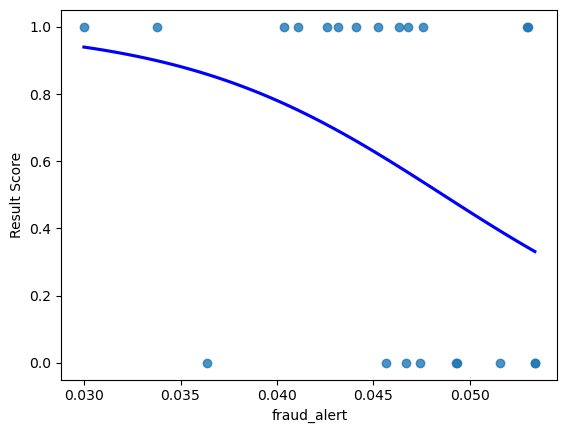

In [48]:
df['Intercept'] = 1  # Manually add an Intercept column with all values set to 1.

# Fit logistic regression using statsmodels
logit_model = sm.Logit(df['Result Score'], df[['Intercept', 'fraud_alert']])
result = logit_model.fit()

# Plotting the logistic regression result
sns.regplot(x='fraud_alert', y='Result Score', data=df, logistic=True, ci=None,
            line_kws={"color": "blue"})
plt.show()


### Adding an Intercept Column to the DataFrame

In logistic regression, the model equation is typically expressed as:

\[ \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n \]

Where:
- \( p \) is the probability of the outcome (e.g., `Result Score` = 1).
- \(\beta_0\) is the intercept term.
- \(\beta_1, \beta_2, \ldots, \beta_n\) are the coefficients for the predictor variables \(X_1, X_2, \ldots, X_n\).

**Why Add an Intercept?**

1. **Baseline Probability**:
   - The intercept (\(\beta_0\)) represents the baseline log-odds of the outcome when all predictor variables are zero. It is essential for establishing a baseline level from which the effects of the predictor variables are measured.
   - Without an intercept, the model would force the log-odds of the outcome to be zero when all predictors are zero, which might not be appropriate for the data and could lead to a biased model.

2. **Model Flexibility**:
   - Including an intercept makes the model more flexible and capable of fitting a wider range of data. It allows the regression line (or logistic curve) to shift up or down, better capturing the underlying relationship between the predictors and the outcome.

3. **Statistical Significance**:
   - The intercept term provides information about the log-odds of the outcome in the absence of other predictors, which can be meaningful in many practical applications.


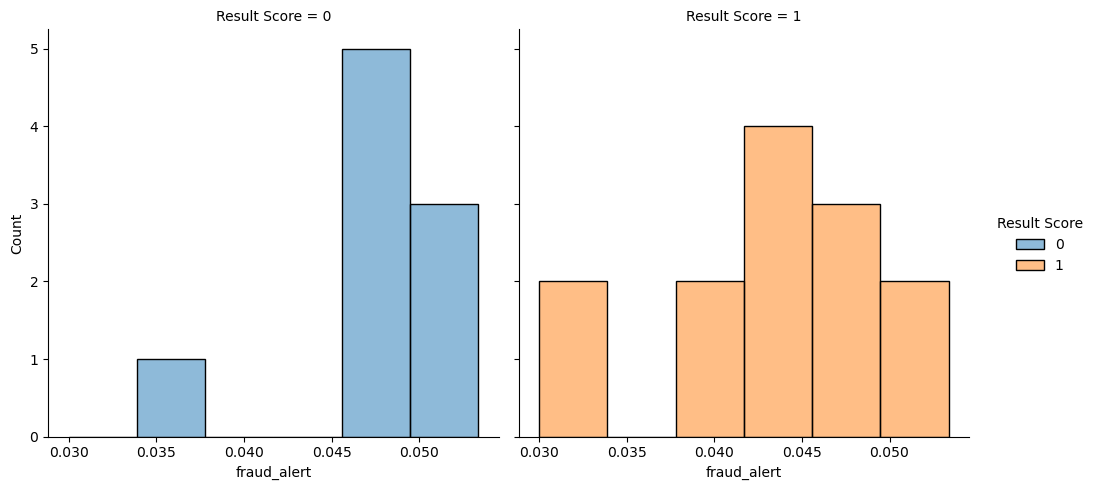

In [49]:
sns.displot(data=df,x='fraud_alert', hue='Result Score', kind='hist', col='Result Score')
plt.show()

### Histogram Analysis of "fraud_alert"

The histogram above displays the distribution of the explanatory variable "fraud_alert". The data for 'result_score=0' is skewed to the left, indicating that higher 'fraud_alert' values typically result in a 0, which is considered unfavorable. Conversely, the data for 'result_score=1' is slightly skewed to the right, suggesting that lower 'fraud_alert' values are associated with a score of 1, denoting a favorable outcome.

In [50]:
# Check existing columns
print("Original Columns:", df.columns)

# Rename the column from 'Result score' to 'result_score' for simplicity
df = df.rename(columns={'Result Score': 'result_score'})

# Verify the change
print("Updated Columns:", df.columns)
print(df.head())

Original Columns: Index(['Youth ID', 'Gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'Days_in_Program', 'Category', 'Result Score', 'fraud_alert',
       'sigma', 'Intercept'],
      dtype='object')
Updated Columns: Index(['Youth ID', 'Gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'Days_in_Program', 'Category', 'result_score', 'fraud_alert',
       'sigma', 'Intercept'],
      dtype='object')
   Youth ID Gender       PWS        DL        SC        RC       HMM  \
0         1      M -0.425201  0.113763  0.014711 -0.463621  0.147781   
1         2      M -0.156009  0.025946  0.208901  0.478853 -0.213461   
2         3      M  0.247779  0.377213 -0.179478  0.478853 -0.102310   
3         4      M -0.761690 -3.150093 -2.736307 -1.510815 -2.450383   
4         5      F  1.055354  0.465030  0.581098  0.583573 -0.699749   

        WSL       CEP        LF  Days_in_Program Category  result_score  \
0 -0.214315  1.236359  0.847431              264     

### Most Likely Outcome

Optimization terminated successfully.
         Current function value: 0.604307
         Iterations 6


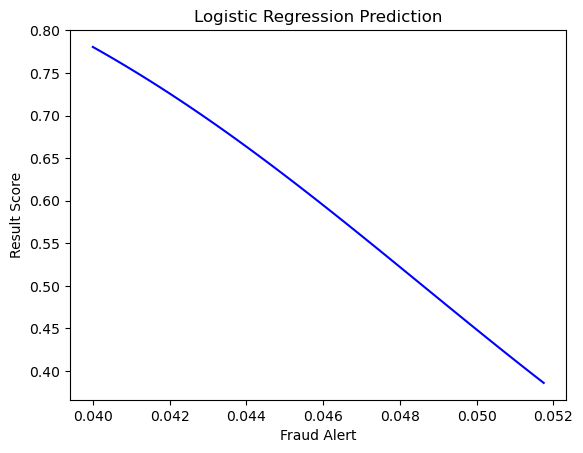

In [51]:
import statsmodels.formula.api as smf

# Making predictions with logistic regression
mdl_fraud = smf.logit("result_score ~ fraud_alert", data=df).fit()

explanatory_data = pd.DataFrame({"fraud_alert": np.arange(0.04, 0.052, 0.00025)})

prediction_data = explanatory_data.assign(result_score=mdl_fraud.predict(explanatory_data))

# Plotting the logistic regression prediction
sns.lineplot(x='fraud_alert', y='result_score', data=prediction_data, color="blue")
plt.xlabel("Fraud Alert")
plt.ylabel("Result Score")
plt.title("Logistic Regression Prediction")
plt.show()


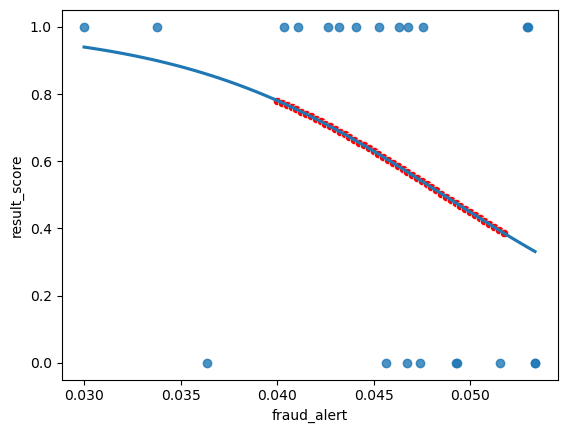

In [52]:
#Adding point predictions to a plot 
sns.regplot(x='fraud_alert', y='result_score', data=df, ci=None, logistic=True)

sns.scatterplot(x='fraud_alert',y='result_score', data=prediction_data, color="red" )


plt.show()


In [53]:
# Calculating most likely outcome
# Using numpy round() function to predict 'most likely outcome'
prediction_data = explanatory_data.assign(result_score=mdl_fraud.predict(explanatory_data))

In [54]:
prediction_data['most_likely_outcome']=np.round(prediction_data['result_score'])

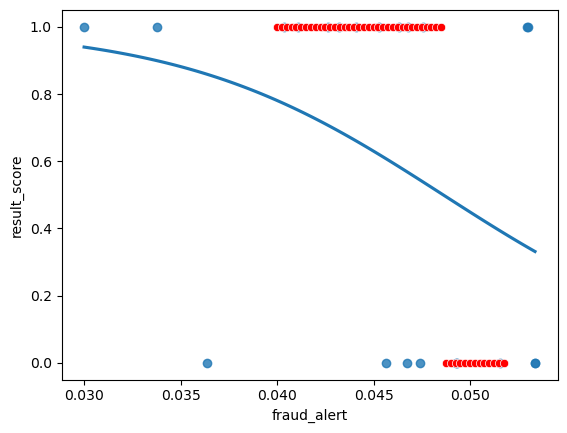

In [55]:
#visualizing most likely outcome
sns.regplot(x='fraud_alert', y='result_score', data=df, ci=None, logistic=True)

sns.scatterplot(x='fraud_alert',y='most_likely_outcome', data=prediction_data, color="red" )
plt.show()


### Again we see as the fraud alert goes up the 'most likely outcome' is the result score approaching 0 which bad.

In [56]:
# Calculating Odds Ratio
prediction_data['odds_ratio']=prediction_data['result_score']/(1-prediction_data['result_score'])
prediction_data['odds_ratio']


0     3.556833
1     3.428061
2     3.303950
3     3.184333
4     3.069046
5     2.957934
6     2.850844
7     2.747631
8     2.648155
9     2.552280
10    2.459877
11    2.370819
12    2.284985
13    2.202258
14    2.122527
15    2.045683
16    1.971620
17    1.900239
18    1.831442
19    1.765136
20    1.701231
21    1.639639
22    1.580277
23    1.523064
24    1.467922
25    1.414777
26    1.363556
27    1.314190
28    1.266610
29    1.220754
30    1.176557
31    1.133961
32    1.092906
33    1.053338
34    1.015203
35    0.978448
36    0.943024
37    0.908883
38    0.875977
39    0.844263
40    0.813697
41    0.784238
42    0.755845
43    0.728480
44    0.702106
45    0.676687
46    0.652188
47    0.628576
Name: odds_ratio, dtype: float64

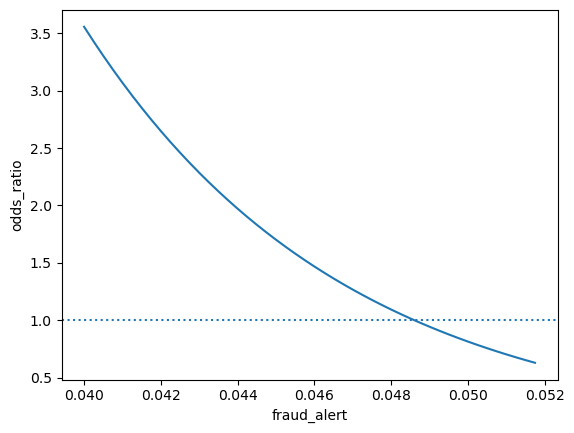

In [57]:
# Visualizing odds ratio 
sns.lineplot(x='fraud_alert',y='odds_ratio', data=prediction_data)

plt.axhline(y=1, 
           linestyle="dotted")
plt.show()


### Descriptions:

"In the bottom-right, the predictions drop below one, so the chance of 'Good=1' becomes less than the chance of 'Bad=0'."

As `fraud_alert` values increase, the plot shows the odds ratio decreasing below 1, indicating that "Bad=0" becomes more likely than "Good=1".

"In the top-left, the chance of 'Good=1' is about 3.5 times more than the chance of 'Bad=0'."

Initially, at lower `fraud_alert` values, "Good=1" is far more likely than "Bad=0", with odds ratios significantly greater than 1, reflecting much higher probabilities of positive outcomes.


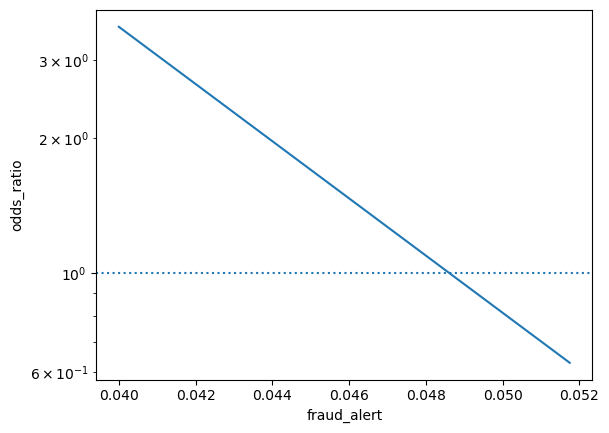

In [58]:
# Visualizing log odds ratio 

sns.lineplot(x='fraud_alert',y='odds_ratio', data=prediction_data)

plt.axhline(y=1, 
           linestyle="dotted")
plt.yscale("log")
plt.show()


In [59]:
# predicting log odds ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])
prediction_data["log_odds_ratio"]

0     1.268871
1     1.231995
2     1.195119
3     1.158243
4     1.121367
5     1.084491
6     1.047615
7     1.010739
8     0.973863
9     0.936987
10    0.900111
11    0.863235
12    0.826359
13    0.789483
14    0.752607
15    0.715732
16    0.678856
17    0.641980
18    0.605104
19    0.568228
20    0.531352
21    0.494476
22    0.457600
23    0.420724
24    0.383848
25    0.346972
26    0.310096
27    0.273220
28    0.236344
29    0.199468
30    0.162592
31    0.125716
32    0.088841
33    0.051965
34    0.015089
35   -0.021787
36   -0.058663
37   -0.095539
38   -0.132415
39   -0.169291
40   -0.206167
41   -0.243043
42   -0.279919
43   -0.316795
44   -0.353671
45   -0.390547
46   -0.427423
47   -0.464299
Name: log_odds_ratio, dtype: float64

In [60]:
# Get the actual responses from the "result_score" column
actual_response = df["result_score"]

# Call the predict method on the fitted logistic regression model
# Ensure to provide it the data frame if necessary, e.g., df[['fraud_alert']] if the model uses this predictor
predicted_response = np.round(mdl_fraud.predict(df))  # Assuming the predictors are the same as those used for fitting

# Combine the actual and predicted responses in a DataFrame
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})

# Print the value counts (confusion matrix)
print(outcomes.value_counts(sort=False))

actual_response  predicted_response
0                0.0                    5
                 1.0                    4
1                0.0                    2
                 1.0                   11
dtype: int64


## Confusion Matrix Interpretation

### Confusion Matrix:
|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| Actual 0       | 5           | 4           |
| Actual 1       | 2           | 11          |

### Definitions:
- **True Positives (TP)**: Cases where the actual response is 1 and the predicted response is also 1 (11 cases).
- **True Negatives (TN)**: Cases where the actual response is 0 and the predicted response is also 0 (5 cases).
- **False Positives (FP)**: Cases where the actual response is 0 but the predicted response is 1 (4 cases).
- **False Negatives (FN)**: Cases where the actual response is 1 but the predicted response is 0 (2 cases).

### Metrics:
1. **Accuracy**: Measures the overall correctness of the model.
   - Calculation: (TP + TN) / Total = (11 + 5) / (5 + 4 + 2 + 11) = 16 / 22 ≈ 0.727
   - Interpretation: The model correctly predicted approximately 72.7% of the cases.

2. **Precision**: Indicates the accuracy of positive predictions.
   - Calculation: TP / (TP + FP) = 11 / (11 + 4) ≈ 0.733
   - Interpretation: When the model predicts 1, it is correct about 73.3% of the time.

3. **Recall (Sensitivity)**: Measures the ability of the model to identify positive instances.
   - Calculation: TP / (TP + FN) = 11 / (11 + 2) ≈ 0.846
   - Interpretation: The model correctly identifies 84.6% of the actual positive cases.

4. **Specificity**: Measures the ability of the model to identify negative instances.
   - Calculation: TN / (TN + FP) = 5 / (5 + 4) ≈ 0.556
   - Interpretation: The model correctly identifies 55.6% of the actual negative cases.

5. **F1 Score**: The harmonic mean of precision and recall.
   - Calculation: 2 * (Precision * Recall) / (Precision + Recall) ≈ 2 * (0.733 * 0.846) / (0.733 + 0.846) ≈ 0.786
   - Interpretation: The F1 score balances precision and recall, indicating a score of 78.6%.

### Conclusion:
The confusion matrix and metrics indicate that the model has a good balance between precision and recall with an overall accuracy of approximately 72.7%. Improvements can be focused on increasing specificity to better identify negative cases.


In [61]:
# Visualizing the confusion matrix
conf_matrix=mdl_fraud.pred_table()
print(conf_matrix)


[[ 5.  4.]
 [ 2. 11.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.40705563093622804, 0.5537098560354374),
  ('0', '1'): (0.0,
   0.55703211517165,
   0.40705563093622804,
   0.44296788482834987),
  ('1', '0'): (0.41203075531433747,
   0.0,
   0.5879692446856626,
   0.1533350370559673),
  ('1', '1'): (0.41203075531433747,
   0.1566572961921799,
   0.5879692446856626,
   0.8433427038078201)})

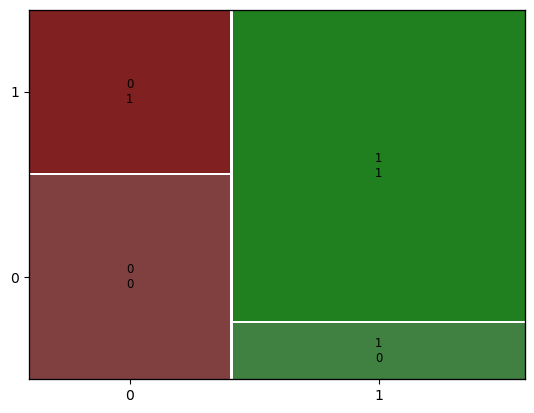

In [62]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)


In [63]:
# Accuracy= represents the proportion of correct predictions (both true positives and true negatives) 
# out of all predictions made.
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [64]:
# Accuracy 
ac=(TN+TP)/(TN+TP+FN+FP)
print(ac)
0.75

0.7272727272727273


0.75

In [65]:
#Sensitivity = identifying positive outcomes correctly
sns=TP/(FN+TP)
print(sns)
0.9

0.8461538461538461


0.9

In [66]:
#Specifity = identifying negative outcomes correctly
spec= TN/(TN+FP)
print(spec)

0.5555555555555556


## Categorical Explanatory variables 


In [67]:
df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,Category,result_score,fraud_alert,sigma,Intercept
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,264,Good,1,0.046791,0.398059,1
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,467,Good,1,0.045256,-0.067687,1
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,49,Bad,0,0.046711,-0.188250,1
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,908,Good,1,0.029993,1.536353,1
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,241,Bad,0,0.049339,0.814614,1


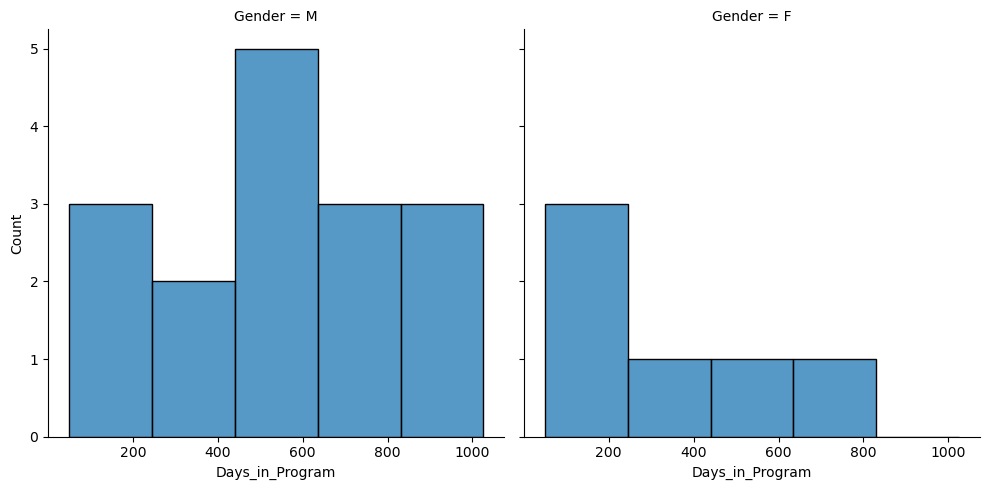

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no variable conflicts
sns = sns

# Assuming df is your DataFrame
# df = pd.DataFrame({...})

# Plot using seaborn's displot
sns.displot(data=df, x='Days_in_Program', col='Gender', col_wrap=2, bins=5)
plt.show()


In [71]:
## Calculating differences in average days spent in the program for M & W
summary_stats=df.groupby("Gender")["Days_in_Program"].mean()
summary_stats

Gender
F    359.5000
M    518.8125
Name: Days_in_Program, dtype: float64

In [72]:
from statsmodels.formula.api import ols
mdl_fraud_vs_gender = ols("Days_in_Program~Gender + 0", data=df).fit()
print(mdl_fraud_vs_gender.params)

Gender[F]    359.5000
Gender[M]    518.8125
dtype: float64


#####  Male's tend to stay longer in the program then Female's

## Making Predictions 

In [73]:
bad_peeps=df[df["Category"]=="Bad"]
bad_peeps

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,Category,result_score,fraud_alert,sigma,Intercept
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,49,Bad,0,0.046711,-0.188250,1
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,241,Bad,0,0.049339,0.814614,1
5,6,M,0.516971,0.289396,0.403090,0.583573,0.328402,0.163484,-0.121190,0.171427,495,Bad,0,0.047391,-0.250145,1
7,8,M,1.189950,0.406485,0.872382,0.939619,0.759114,0.903971,0.967295,0.847431,184,Bad,0,0.051540,-0.763943,1
8,9,M,-1.501968,-1.949931,-0.745864,-1.154769,-0.838688,-1.876633,-1.209675,-0.931528,443,Bad,0,0.036357,0.598011,1
9,10,F,0.853460,0.025946,-0.179478,0.813955,-0.102310,-0.440995,-0.940611,0.633956,476,Bad,0,0.045656,1.185467,1
11,12,M,0.584268,0.713844,0.500185,0.583573,0.328402,0.465724,0.551470,0.633956,472,Bad,0,0.049272,-0.468137,1
17,18,M,1.189950,0.889477,0.969477,0.939619,1.592749,1.145763,1.236359,0.847431,140,Bad,0,0.053368,-1.823278,1
19,20,M,1.189950,0.889477,0.969477,0.939619,1.592749,1.145763,1.236359,0.847431,635,Bad,0,0.053368,-1.823278,1


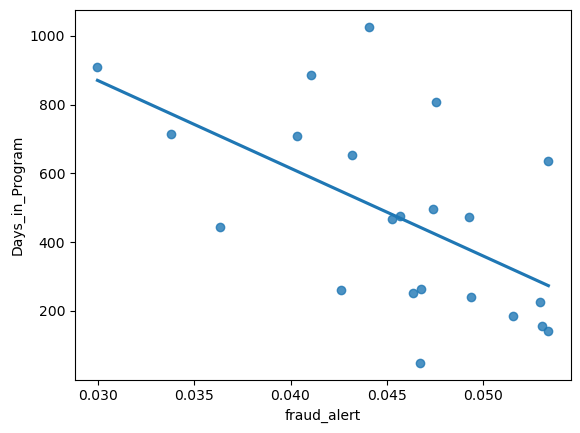

In [74]:
#scatter plot with trendline 
sns.regplot(x="fraud_alert", y="Days_in_Program",data=df, ci=None)
plt.show()

In [75]:
#Create model and fit
mdl_fraud_vs_Days_in_Program=ols("fraud_alert~Days_in_Program", data=df).fit()
mdl_fraud_vs_Days_in_Program

In [76]:
##choosing explanatory variables 
explanatory_data=pd.DataFrame({"Days_in_Program":np.arange(-12,10)})
explanatory_data.head()

,Days_in_Program
0,-12
1,-11
2,-10
3,-9
4,-8


In [77]:
#making predictions
print(mdl_fraud_vs_Days_in_Program.predict(explanatory_data))

0     0.051667
1     0.051654
2     0.051641
3     0.051629
4     0.051616
5     0.051603
6     0.051590
7     0.051578
8     0.051565
9     0.051552
10    0.051539
11    0.051527
12    0.051514
13    0.051501
14    0.051489
15    0.051476
16    0.051463
17    0.051450
18    0.051438
19    0.051425
20    0.051412
21    0.051399
dtype: float64


#### The predict function returns a Series of predictions, one for each row of the explanatory data.

In [78]:
#create side by side analysis with explanatory data & fraud_alert predictions
prediction_data= explanatory_data.assign(fraud_alert=mdl_fraud_vs_Days_in_Program.predict(explanatory_data))
print(prediction_data)

    Days_in_Program  fraud_alert
0               -12     0.051667
1               -11     0.051654
2               -10     0.051641
3                -9     0.051629
4                -8     0.051616
5                -7     0.051603
6                -6     0.051590
7                -5     0.051578
8                -4     0.051565
9                -3     0.051552
10               -2     0.051539
11               -1     0.051527
12                0     0.051514
13                1     0.051501
14                2     0.051489
15                3     0.051476
16                4     0.051463
17                5     0.051450
18                6     0.051438
19                7     0.051425
20                8     0.051412
21                9     0.051399


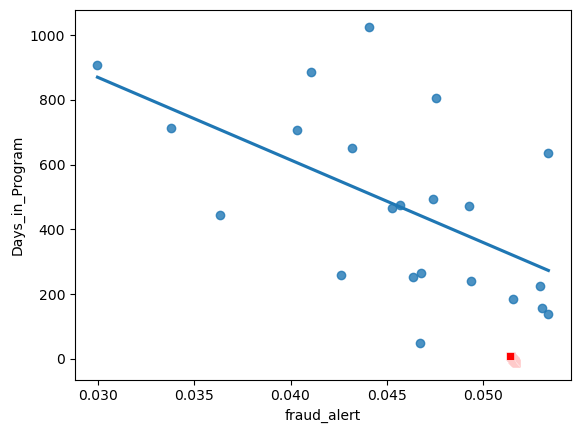

In [79]:
#visualize predictions on scatter plt with real results. 
fig=plt.figure()
sns.regplot(x="fraud_alert", y="Days_in_Program",data=df, ci=None)
sns.scatterplot(x= "fraud_alert", y="Days_in_Program", data=prediction_data, color='red', marker='s')
plt.show()

In [80]:
# Extrapolating with predictions outside of range
small_days=pd.DataFrame({"Days_in_Program":[500] })
pred_small_days=small_days.assign(fraud_alert=mdl_fraud_vs_Days_in_Program.predict(small_days))
print(pred_small_days)

   Days_in_Program  fraud_alert
0              500     0.045141


In [98]:
## Working with Model Objects with residuals. 
## Is the model of quality? 
print(mdl_fraud_vs_Days_in_Program.resid)

0    -0.001358
1    -0.000305
2    -0.004179
3    -0.009947
4     0.000897
5     0.002187
6    -0.000015
7     0.002372
8    -0.009510
9     0.000210
10   -0.002129
11    0.003775
12    0.006311
13    0.004309
14    0.005647
15    0.003496
16   -0.005585
17    0.003639
18   -0.001952
19    0.009949
20    0.000834
21   -0.008643
dtype: float64


In [81]:
mdl_fraud_vs_Days_in_Program.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fraud_alert   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     9.655
Date:                Thu, 16 May 2024   Prob (F-statistic):            0.00555
Time:                        08:30:10   Log-Likelihood:                 85.071
No. Observations:                  22   AIC:                            -166.1
Df Residuals:                      20   BIC:                            -164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0515      0.002     22.846      0.000       0.047       0.056
Days_in_Program -1.275e-05    4.1e-06     -3.107      0.006   -2.13e-05   -4.19e-06
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.653
Skew:                          -0.382   Prob(JB):                        0.722
Kurtosis:                       2.642   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# OLS Regression Results Explanation

## Summary
This section provides a detailed explanation of the Ordinary Least Squares (OLS) regression results for predicting the `fraud_alert` dependent variable.

### Model Summary
- **Dependent Variable**: `fraud_alert`
- **Model**: Ordinary Least Squares (OLS)
- **Method**: Least Squares
- **Date**: Wed, 15 May 2024
- **Time**: 20:29:26
- **Number of Observations**: 22
- **Degrees of Freedom (Residuals)**: 20
- **Degrees of Freedom (Model)**: 1

### Goodness of Fit
- **R-squared**: 0.326
  - This indicates that approximately 32.6% of the variability in the `fraud_alert` variable is explained by the model.
- **Adjusted R-squared**: 0.292
  - Adjusted for the number of predictors in the model, this value is slightly lower, indicating a moderate fit.
- **F-statistic**: 9.655
  - The F-statistic tests whether at least one predictor variable has a non-zero coefficient.
- **Prob (F-statistic)**: 0.00555
  - This p-value indicates that the overall model is statistically significant at the 0.05 significance level.

### Model Coefficients
| Variable           | Coefficient | Std. Error | t-Statistic | P-value | [0.025 | 0.975] |
|--------------------|-------------|------------|-------------|---------|--------|--------|
| Intercept          | 0.0515      | 0.002      | 22.846      | 0.000   | 0.047  | 0.056  |
| Days_in_Program    | -1.275e-05  | 4.1e-06    | -3.107      | 0.006   | -2.13e-05 | -4.19e-06 |

- **Intercept**: The intercept value is 0.0515, with a standard error of 0.002. This value is highly significant (p < 0.001).
- **Days_in_Program**: The coefficient for `Days_in_Program` is -1.275e-05, with a standard error of 4.1e-06. This indicates that for each additional day in the program, the `fraud_alert` value decreases by approximately 0.00001275. This coefficient is statistically significant (p = 0.006).

### Statistical Tests
- **Omnibus Test**: 0.775 (Prob: 0.679)
  - This test checks for skewness and kurtosis. A higher p-value indicates that the residuals are normally distributed.
- **Durbin-Watson**: 1.747
  - This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.
- **Jarque-Bera (JB) Test**: 0.653 (Prob: 0.722)
  - This test also checks for normality of residuals. A higher p-value supports the hypothesis that residuals are normally distributed.
- **Skew**: -0.382
  - Measures the asymmetry of the residuals. A value close to 0 indicates symmetry.
- **Kurtosis**: 2.642
  - Measures the tailedness of the residual distribution. A value close to 3 indicates a normal distribution.

### Model Diagnostics
- **AIC**: -166.1
  - Akaike Information Criterion, used for model comparison. Lower values indicate a better fit.
- **BIC**: -164.0
  - Bayesian Information Criterion, similar to AIC but includes a penalty for the number of parameters. Lower values are preferred.
- **Condition Number**: 1.09e+03
  - Indicates potential multicollinearity. A high value (greater than 30) suggests multicollinearity issues.

## Conclusion
The OLS regression results suggest that the `Days_in_Program` variable has a statistically significant negative impact on the `fraud_alert` dependent variable. The model explains approximately 32.6% of the variability in `fraud_alert`, and the overall model is statistically significant.

Further analysis and additional predictors may be needed to improve the model's explanatory power and predictive accuracy.


In [82]:
## Quantifying model fit 
# interpretation in simple linear regression
coeffr_determination=df["Days_in_Program"].corr(df["fraud_alert"])**2
coeffr_determination

0.3255837753359106

In [83]:
#Calculate the residuale standard error 
mse=mdl_fraud_vs_Days_in_Program.resid
print('mse:', mse)

mse: 0    -0.001358
1    -0.000305
2    -0.004179
3    -0.009947
4     0.000897
5     0.002187
6    -0.000015
7     0.002372
8    -0.009510
9     0.000210
10   -0.002129
11    0.003775
12    0.006311
13    0.004309
14    0.005647
15    0.003496
16   -0.005585
17    0.003639
18   -0.001952
19    0.009949
20    0.000834
21   -0.008643
dtype: float64


In [84]:
rse=np.sqrt(mse)
print('res:',rse)

res: 0          NaN
1          NaN
2          NaN
3          NaN
4     0.029949
5     0.046762
6          NaN
7     0.048701
8          NaN
9     0.014494
10         NaN
11    0.061439
12    0.079443
13    0.065640
14    0.075143
15    0.059126
16         NaN
17    0.060322
18         NaN
19    0.099742
20    0.028878
21         NaN
dtype: float64


/Users/oakmoreroadinc./anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
## Visualizing model fit 

Text(0, 0.5, 'Residuals')

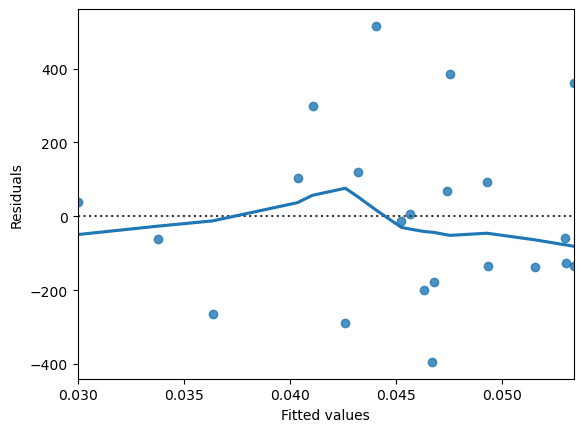

In [85]:
#Residual versus fitted plot
sns.residplot(x="fraud_alert", y="Days_in_Program", data=df,lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

### The plot above is a good fit becasue the residuals aprox normally distributed with a mean of "0".
### In addition the lowless trend line closely follows the y=0 line, suggest the residuals are normally distributed with mean zero.


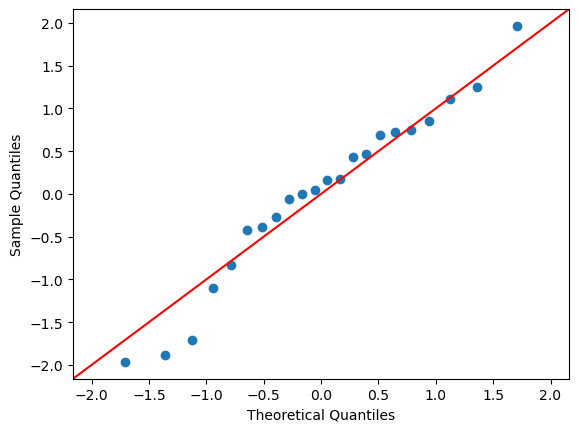

In [86]:
# Creating QQ plot 
from statsmodels.api import qqplot 
qqplot(data=mdl_fraud_vs_Days_in_Program.resid, fit=True, line="45")
plt.show()

### For QQQ>>> Points track around a straight line indicating a good fit.

In [87]:
df.to_csv("log_reg_end.csv")